In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

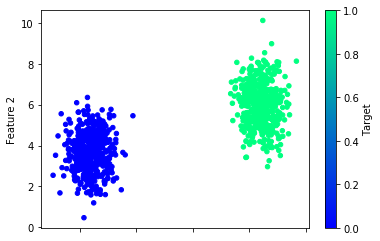

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 660us/sample - loss: 0.6974 - accuracy: 0.4653
Epoch 2/100
750/750 [==============================] - 0s 43us/sample - loss: 0.6946 - accuracy: 0.4867
Epoch 3/100
750/750 [==============================] - 0s 41us/sample - loss: 0.6921 - accuracy: 0.5147
Epoch 4/100
750/750 [==============================] - 0s 44us/sample - loss: 0.6898 - accuracy: 0.5413
Epoch 5/100
750/750 [==============================] - 0s 43us/sample - loss: 0.6873 - accuracy: 0.5653
Epoch 6/100
750/750 [==============================] - 0s 45us/sample - loss: 0.6845 - accuracy: 0.5933
Epoch 7/100
750/750 [==============================] - 0s 47us/sample - loss: 0.6810 - accuracy: 0.6147
Epoch 8/100
750/750 [==============================] - 0s 45us/sample - loss: 0.6767 - accuracy: 0.6320
Epoch 9/100
750/750 [==============================] - 0s 45us/sample - loss: 0.6715 - accuracy: 0.6467
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 41us/sample - loss: 0.1436 - accuracy: 0.9880
Epoch 79/100
750/750 [==============================] - 0s 43us/sample - loss: 0.1406 - accuracy: 0.9880
Epoch 80/100
750/750 [==============================] - 0s 41us/sample - loss: 0.1377 - accuracy: 0.9907
Epoch 81/100
750/750 [==============================] - 0s 40us/sample - loss: 0.1349 - accuracy: 0.9907
Epoch 82/100
750/750 [==============================] - 0s 41us/sample - loss: 0.1322 - accuracy: 0.9920
Epoch 83/100
750/750 [==============================] - 0s 41us/sample - loss: 0.1295 - accuracy: 0.9933
Epoch 84/100
750/750 [==============================] - 0s 39us/sample - loss: 0.1269 - accuracy: 0.9933
Epoch 85/100
750/750 [==============================] - 0s 47us/sample - loss: 0.1244 - accuracy: 0.9947
Epoch 86/100
750/750 [==============================] - 0s 45us/sample - loss: 0.1219 - accuracy: 0.9947
Epoch 87/100
750/750 [==============================] - 0s 44us/samp

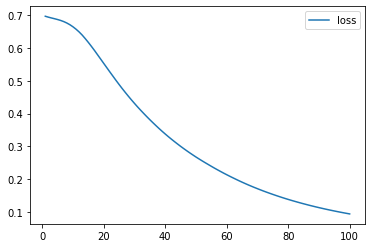

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

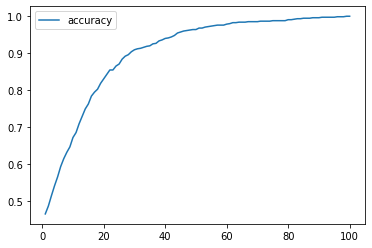

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0863 - accuracy: 1.0000
Loss: 0.08625655096769333, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

nn_model.predict_classes(new_X)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

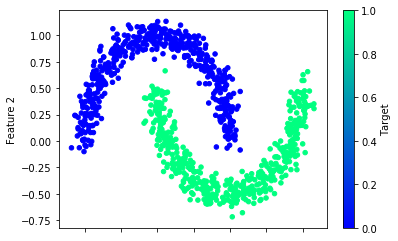

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 318us/sample - loss: 1.2938 - accuracy: 0.3787
Epoch 2/100
750/750 [==============================] - 0s 43us/sample - loss: 1.1203 - accuracy: 0.3987
Epoch 3/100
750/750 [==============================] - 0s 47us/sample - loss: 1.0115 - accuracy: 0.4253
Epoch 4/100
750/750 [==============================] - 0s 44us/sample - loss: 0.9417 - accuracy: 0.4453
Epoch 5/100
750/750 [==============================] - 0s 40us/sample - loss: 0.8902 - accuracy: 0.4747
Epoch 6/100
750/750 [==============================] - 0s 45us/sample - loss: 0.8503 - accuracy: 0.4840
Epoch 7/100
750/750 [==============================] - 0s 47us/sample - loss: 0.8180 - accuracy: 0.5067
Epoch 8/100
750/750 [==============================] - 0s 45us/sample - loss: 0.7907 - accuracy: 0.5213
Epoch 9/100
750/750 [==============================] - 0s 45us/sample - loss: 0.7667 - accuracy: 0.5347
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 44us/sample - loss: 0.3097 - accuracy: 0.8680
Epoch 79/100
750/750 [==============================] - 0s 36us/sample - loss: 0.3079 - accuracy: 0.8680
Epoch 80/100
750/750 [==============================] - 0s 40us/sample - loss: 0.3062 - accuracy: 0.8680
Epoch 81/100
750/750 [==============================] - 0s 40us/sample - loss: 0.3045 - accuracy: 0.8693
Epoch 82/100
750/750 [==============================] - 0s 37us/sample - loss: 0.3029 - accuracy: 0.8693
Epoch 83/100
750/750 [==============================] - 0s 40us/sample - loss: 0.3013 - accuracy: 0.8693
Epoch 84/100
750/750 [==============================] - 0s 39us/sample - loss: 0.2999 - accuracy: 0.8693
Epoch 85/100
750/750 [==============================] - 0s 39us/sample - loss: 0.2984 - accuracy: 0.8720
Epoch 86/100
750/750 [==============================] - 0s 37us/sample - loss: 0.2970 - accuracy: 0.8720
Epoch 87/100
750/750 [==============================] - 0s 37us/samp

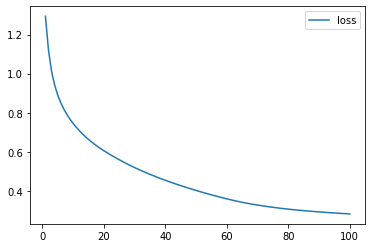

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

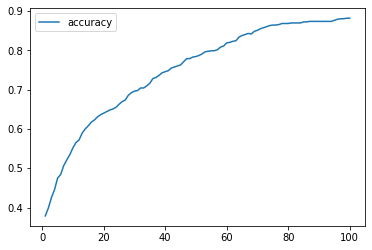

In [19]:
# Plot the loss
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 521us/sample - loss: 0.6706 - accuracy: 0.6040
Epoch 2/100
750/750 [==============================] - 0s 39us/sample - loss: 0.6415 - accuracy: 0.6333
Epoch 3/100
750/750 [==============================] - 0s 44us/sample - loss: 0.6178 - accuracy: 0.6640
Epoch 4/100
750/750 [==============================] - 0s 43us/sample - loss: 0.5986 - accuracy: 0.6947
Epoch 5/100
750/750 [==============================] - 0s 40us/sample - loss: 0.5823 - accuracy: 0.7160
Epoch 6/100
750/750 [==============================] - 0s 45us/sample - loss: 0.5678 - accuracy: 0.7280
Epoch 7/100
750/750 [==============================] - 0s 47us/sample - loss: 0.5549 - accuracy: 0.7467
Epoch 8/100
750/750 [==============================] - 0s 43us/sample - loss: 0.5435 - accuracy: 0.7600
Epoch 9/100
750/750 [==============================] - 0s 47us/sample - loss: 0.5331 - accuracy: 0.7653
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 37us/sample - loss: 0.2404 - accuracy: 0.8907
Epoch 79/100
750/750 [==============================] - 0s 48us/sample - loss: 0.2396 - accuracy: 0.8933
Epoch 80/100
750/750 [==============================] - 0s 39us/sample - loss: 0.2389 - accuracy: 0.8920
Epoch 81/100
750/750 [==============================] - 0s 39us/sample - loss: 0.2382 - accuracy: 0.8920
Epoch 82/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2375 - accuracy: 0.8933
Epoch 83/100
750/750 [==============================] - 0s 43us/sample - loss: 0.2368 - accuracy: 0.8933
Epoch 84/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2360 - accuracy: 0.8933
Epoch 85/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2353 - accuracy: 0.8933
Epoch 86/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2345 - accuracy: 0.8933
Epoch 87/100
750/750 [==============================] - 0s 39us/samp